In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/drive/My Drive/CSV files for Deep learning and ML/Fake news/train.csv")

In [0]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
# Getting the independent features

X = df.drop("label", axis = 1)

In [0]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [0]:
# Getting the independent features

y = df["label"]

In [0]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [0]:
# Importing the vectorization texhniques

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [0]:
df.shape

(20800, 5)

In [0]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [0]:
# dropping the NaN values
df = df.dropna()

In [0]:
df.shape

(18285, 5)

- Earlier there were 20800 data points and after removing all the NaN values, we have 18285 data points.
- Since this is a text data, we do not want to apply any feature engineering on the NaN values. Hence we have removed the NaN values completely.

In [0]:
# Creating a copy of dataset

message = df.copy()

In [0]:
# Resetting the index values so that for loop can be applied easily

message.reset_index(inplace = True)

- As we drop the NaN values, some of the rows get deleted. But the index of the rows remain the same. 
- Eg: If row 6 is deleted due to dropna, the index of row 7 does not become 6 but it remains 7. Hence we apply reset_index

In [0]:
message.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [0]:
message["title"][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [0]:
# Cleaning the text data

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range (0, len(message)):
  review = re.sub("[^a-zA-Z]", ' ', message["title"][i])
  review = review.lower()
  review = review.split() # we perform split to apply stemming and remove stopwords
  review = [ps.stem(words) for words in review if not words in stopwords.words("english")]
  review = " ".join(review) # combining all the spaces with .join()
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [0]:
# Applying Count Vectorizer(Bag_of_Words model)

cv = CountVectorizer(max_features=5000, ngram_range=(1,3)) # We will use most frequent 5000 words as our features and will use unigram, bigram and trigram
X = cv.fit_transform(corpus).toarray()

In [0]:
X.shape # X has 5000 features

(18285, 5000)

In [0]:
y = message["label"]

In [0]:
y.shape

(18285,)

In [0]:
# Divide the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [0]:
# Getting the top 20 feature names

cv.get_feature_names()[0:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [0]:
# Gives information regarding the count vectiorizer

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

#### X is currently a numpy array. We will convert it to a dataframe
- This step is just to see how the vectors are formed

In [0]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names())

In [0]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [0]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


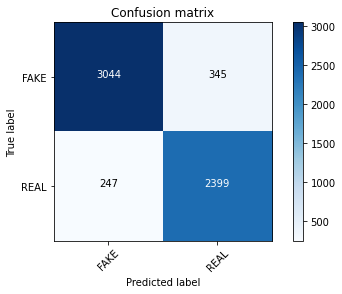

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

### Passive Aggressive Classifier Algorithm

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter = 50)

accuracy:   0.920
Confusion matrix, without normalization


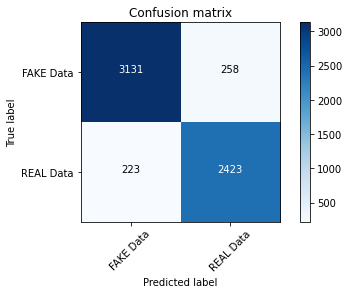

In [0]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [0]:
classifier = MultinomialNB(alpha = 0.1)

In [0]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha = alpha)
  sub_classifier.fit(X_train, y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  if score > previous_score:
    classifier = sub_classifier
  print ("Alpha : {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha : 0.0, Score : 0.8903065451532726
Alpha : 0.1, Score : 0.9020712510356255
Alpha : 0.2, Score : 0.9025683512841757
Alpha : 0.30000000000000004, Score : 0.9024026512013256
Alpha : 0.4, Score : 0.9017398508699255
Alpha : 0.5, Score : 0.9015741507870754
Alpha : 0.6000000000000001, Score : 0.9022369511184756
Alpha : 0.7000000000000001, Score : 0.9025683512841757
Alpha : 0.8, Score : 0.9015741507870754
Alpha : 0.9, Score : 0.9017398508699255


In [0]:
# Get Feature Names

feature_names = cv.get_feature_names()

In [0]:
classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

- The most negative words are the most fake words 
- The most positive words are the most true words

In [0]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [0]:
#Most Fake Words

sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new')]

### Fake News Classifier using TF-IDF

- In Count Vectorizer, we applied count_vectorizer on the "Title"
- In TF-IDF, we will apply TF-IDF on the "text" column

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/drive/My Drive/CSV files for Deep learning and ML/Fake news/train.csv")

In [0]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [0]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [0]:
## Get the Dependent features
y=df['label']

In [0]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [0]:
df.shape

(20800, 5)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [0]:
df=df.dropna()

In [0]:

df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [0]:
messages=df.copy()

In [0]:
messages.reset_index(inplace=True)

In [0]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [0]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

#### TF-IDF Vectorizer

In [0]:
# Creating a TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = tfidf.fit_transform(corpus).toarray()

In [0]:
X.shape

In [0]:
y = message["label"]

In [0]:
# Divide the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [0]:
tfidf.get_feature_names()[:20]

In [0]:
tfidf.get_params()

In [0]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [0]:
count_df.head()

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial NB

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [0]:
from sklearn import metrics
import numpy as np
import itertools

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [0]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

### Passive Aggressive Classifier Algorithm

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)

In [0]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

#### Multinomial Classifier with Hyperparameter

In [0]:
classifier=MultinomialNB(alpha=0.1)

In [0]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

In [0]:
## Get Features names
feature_names = cv.get_feature_names()

In [0]:
classifier.coef_[0]

In [0]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

In [0]:
### Most Fake
sorted(zip(classifier.coef_[0], feature_names))[:20]